  
https://www.kaggle.com/jadentseng/exercise-proximity-analysis/edit

In [2]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon

import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

#### 1) Visualize the collision data.
Load a GeoDataFrame `collisions` tracking major motor vehicle collisions in 2013-2018.


In [4]:
collisions = gpd.read_file("input/geospatial-learn-course-data/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions.shp")
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET,CROSS STRE,OFF STREET,...,CONTRIBU_2,CONTRIBU_3,CONTRIBU_4,UNIQUE KEY,VEHICLE TY,VEHICLE _1,VEHICLE _2,VEHICLE _3,VEHICLE _4,geometry
0,07/30/2019,0:00,BRONX,10464,40.841100,-73.784960,"(40.8411, -73.78496)",None,None,121 PILOT STREET,...,Unspecified,None,None,4180045,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,POINT (1043750.211 245785.815)
1,07/30/2019,0:10,QUEENS,11423,40.710827,-73.770660,"(40.710827, -73.77066)",JAMAICA AVENUE,188 STREET,None,...,None,None,None,4180007,Sedan,Sedan,None,None,None,POINT (1047831.185 198333.171)
2,07/30/2019,0:25,None,None,40.880318,-73.841286,"(40.880318, -73.841286)",BOSTON ROAD,None,None,...,None,None,None,4179575,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (1028139.293 260041.178)
3,07/30/2019,0:35,MANHATTAN,10036,40.756744,-73.984590,"(40.756744, -73.98459)",None,None,155 WEST 44 STREET,...,None,None,None,4179544,Box Truck,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (988519.261 214979.320)
4,07/30/2019,10:00,BROOKLYN,11223,40.600090,-73.965910,"(40.60009, -73.96591)",AVENUE T,OCEAN PARKWAY,None,...,None,None,None,4180660,Station Wagon/Sport Utility Vehicle,Bike,None,None,None,POINT (993716.669 157907.212)


Use the "LATITUDE" and "LONGITUDE" columns to create an interactive map to visualize the collision data. What type of map do you think is most effective?

In [5]:
m_1 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the collision data
HeatMap(data = collisions[['LATITUDE','LONGITUDE']],radius = 9).add_to(m_1)

# Uncomment to see a hint
#q_1.hint()

# Show the map
embed_map(m_1, "q_1_Proximity-Analysis.html")

#### 2) Understand hospital coverage.
Load the hospital data.

In [6]:
hospitals = gpd.read_file("input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shp")
hospitals.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,latitude,longitude,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,40.843490,-73.911010,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,40.831429,-73.903178,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,40.848060,-73.843656,POINT (1027505.000 248287.000)
3,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,40.855687,-73.845311,POINT (1027042.000 251065.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,40.816758,-73.924478,POINT (1005154.000 236853.000)


Use the "latitude" and "longitude" columns to visualize the hospital locations.

In [8]:
m_2 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the hospital locations
for idx, row in hospitals.iterrows():
    Marker([row['latitude'], row['longitude']],popup=row['name']).add_to(m_2)
        
# Show the map
embed_map(m_2, "q_2_hospital-coverage.html")

#### 3) When was the closest hospital more than 10 kilometers away?
Create a DataFrame `outside_range` containing all rows from `collisions` with crashes that occurred more than 10 kilometers from the closest hospital.  

Note that both `hospitals` and `collisions` have EPSG 2263 as the coordinate reference system, and EPSG 2263 has units of meters.  

Hint: Begin by creating a `buffer` of size 10000 around each point in `hospitals.geometry`. Then, use the `unary_union` attribute to create a `MultiPolygon` object, before checking to see if it contains each collision.

In [16]:
coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(10000) # 10 km buffers from the center of hospitals
coverage.head()

0    POLYGON ((1018872.000 246596.000, 1018823.847 ...
1    POLYGON ((1021044.000 242204.000, 1020995.847 ...
2    POLYGON ((1037505.000 248287.000, 1037456.847 ...
3    POLYGON ((1037042.000 251065.000, 1036993.847 ...
4    POLYGON ((1015154.000 236853.000, 1015105.847 ...
dtype: geometry

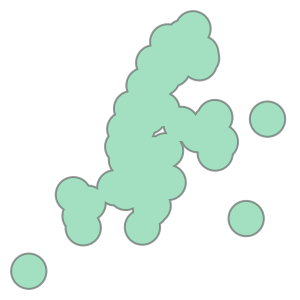

In [17]:
my_union = coverage.geometry.unary_union
my_union

In [18]:
outside_range = collisions.loc[~collisions["geometry"].apply(lambda x: my_union.contains(x))]
outside_range.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET,CROSS STRE,OFF STREET,...,CONTRIBU_2,CONTRIBU_3,CONTRIBU_4,UNIQUE KEY,VEHICLE TY,VEHICLE _1,VEHICLE _2,VEHICLE _3,VEHICLE _4,geometry
0,07/30/2019,0:00,BRONX,10464,40.841100,-73.784960,"(40.8411, -73.78496)",None,None,121 PILOT STREET,...,Unspecified,None,None,4180045,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,POINT (1043750.211 245785.815)
1,07/30/2019,0:10,QUEENS,11423,40.710827,-73.770660,"(40.710827, -73.77066)",JAMAICA AVENUE,188 STREET,None,...,None,None,None,4180007,Sedan,Sedan,None,None,None,POINT (1047831.185 198333.171)
5,07/30/2019,10:50,QUEENS,11423,40.721060,-73.759450,"(40.72106, -73.75945)",FRANCIS LEWIS BOULEVARD,HILLSIDE AVENUE,None,...,None,None,None,4179812,Sedan,Box Truck,None,None,None,POINT (1050928.749 202069.687)
6,07/30/2019,10:55,QUEENS,11434,40.676228,-73.761120,"(40.676228, -73.76112)",CRANDALL AVENUE,CHENEY STREET,None,...,None,None,None,4180464,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (1050510.380 185734.852)
15,07/30/2019,13:05,None,None,40.588413,-74.166725,"(40.588413, -74.166725)",None,None,26 RICHMOND HILL ROAD,...,None,None,None,4180091,Station Wagon/Sport Utility Vehicle,Box Truck,None,None,None,POINT (937943.004 153695.210)


The next code cell calculates the percentage of collisions that occurred more than 10 kilometers away from the closest hospital.

In [19]:
percentage = round(100*len(outside_range)/len(collisions), 2)
print(" Percentage of collisions more than 10 km away from the closest hospital: {}%".format(percentage))

 Percentage of collisions more than 10 km away from the closest hospital: 15.12%
